# Assignment Tasks: 
## Task 1: Exploratory Data Analysis (EDA) and Business Insights 
### 1. Perform EDA on the provided dataset. 
### 2. Derive at least 5 business insights from the EDA. 
#### ○ Write these insights in short point-wise sentences (maximum 100 words per 
#### insight).

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
import os

In [2]:
print(os.listdir(r'C:\Users\HP\OneDrive\Documents\Python_Program\Data Science Assignment eCommerce\Datasets'))

['.ipynb_checkpoints', 'Customers.csv', 'Products.csv', 'Transactions.csv', 'Untitled.ipynb']


# Exploratory Data Analysis

In [3]:
ls Datasets

 Volume in drive C is OS
 Volume Serial Number is B09C-EF2A

 Directory of C:\Users\HP\OneDrive\Documents\Python_Program\Data Science Assignment eCommerce\Datasets

26-01-2025  21:46    <DIR>          .
28-01-2025  00:38    <DIR>          ..
26-01-2025  21:46    <DIR>          .ipynb_checkpoints
25-01-2025  11:59             8,542 Customers.csv
25-01-2025  12:00             4,247 Products.csv
25-01-2025  12:01            54,748 Transactions.csv
26-01-2025  21:46                72 Untitled.ipynb
               4 File(s)         67,609 bytes
               3 Dir(s)  46,252,654,592 bytes free


In [4]:

customer_df = pd.read_csv("Datasets/Customers.csv")
product_df = pd.read_csv("Datasets/Products.csv")
transaction_df = pd.read_csv("Datasets/Transactions.csv")


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [6]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [7]:
transaction_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
customer_df[customer_df["CustomerID"] == "C0199"]

,CustomerID,CustomerName,Region,SignupDate
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [9]:
product_df[product_df["ProductID"] == "P067"]["Category"].values[0]

'Electronics'

In [10]:
category = []
product_name = []
customer_region = []
signupdate=[]

for customer_id, product_id in zip(transaction_df["CustomerID"].tolist(), transaction_df["ProductID"].tolist()):
    category_ = product_df[product_df["ProductID"] == product_id]["Category"].values[0]
    product_name_ = product_df[product_df["ProductID"] == product_id]["ProductName"].values[0]
    region_ = customer_df[customer_df["CustomerID"] == customer_id]["Region"].values[0]
    signupdate_=customer_df[customer_df["CustomerID"]==customer_id]["SignupDate"].values[0]
    category.append(category_)
    product_name.append(product_name_)
    customer_region.append(region_)
    signupdate.append(signupdate_)
    

In [11]:
transaction_df["Category"] = category
transaction_df["ProductName"] = product_name
transaction_df["Region"] = customer_region
transaction_df["SignupDate"]=signupdate

In [12]:
transaction_df.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Category,ProductName,Region,SignupDate
791,T00278,C0077,P097,2024-09-26 16:10:17,1,319.34,319.34,Books,BookWorld Cookbook,South America,2023-10-18
550,T00467,C0045,P096,2024-03-16 04:08:29,3,922.41,307.47,Electronics,SoundWave Headphones,Asia,2022-02-25
604,T00353,C0012,P063,2024-10-22 21:55:48,1,33.59,33.59,Books,TechPro Novel,South America,2024-08-07
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Electronics,ComfortLiving Bluetooth Speaker,South America,2024-04-11
258,T00607,C0175,P051,2024-10-04 01:18:02,4,260.64,65.16,Home Decor,ComfortLiving Desk Lamp,Asia,2022-04-16


In [13]:
transaction_df.to_csv("transaction_data.csv", index=False)

In [14]:
transaction_df.shape

(1000, 11)

In [15]:
customer_df["Region"].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [16]:
transaction_df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
Category           0
ProductName        0
Region             0
SignupDate         0
dtype: int64

In [17]:
transaction_df.duplicated().sum()

0

In [18]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   Category         1000 non-null   object 
 8   ProductName      1000 non-null   object 
 9   Region           1000 non-null   object 
 10  SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [19]:
transaction_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [20]:
transaction_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'Category', 'ProductName', 'Region',
       'SignupDate'],
      dtype='object')

In [21]:
transaction_df["ProductName"].unique().tolist()

['ComfortLiving Bluetooth Speaker',
 'HomeSense T-Shirt',
 'ActiveWear Smartphone',
 'TechPro Textbook',
 'TechPro Running Shoes',
 'TechPro Rug',
 'ActiveWear Cookware Set',
 'BookWorld Biography',
 'BookWorld Cookware Set',
 'HomeSense Novel',
 'ComfortLiving Smartphone',
 'SoundWave Cookbook',
 'ComfortLiving Smartwatch',
 'SoundWave Mystery Book',
 'TechPro Vase',
 'HomeSense Desk Lamp',
 'ActiveWear Wall Art',
 'ComfortLiving Biography',
 'ComfortLiving Desk Lamp',
 'SoundWave Novel',
 'ComfortLiving Cookware Set',
 'TechPro Novel',
 'BookWorld Running Shoes',
 'ActiveWear Jeans',
 'BookWorld Jacket',
 'BookWorld Smartwatch',
 'ActiveWear Textbook',
 'ActiveWear Smartwatch',
 'ActiveWear Cookbook',
 'SoundWave Headphones',
 'HomeSense Rug',
 'HomeSense Sweater',
 'TechPro Smartwatch',
 'ActiveWear Running Shoes',
 'HomeSense Wall Art',
 'SoundWave Rug',
 'ActiveWear Headphones',
 'SoundWave Jeans',
 'SoundWave Desk Lamp',
 'BookWorld Cookbook',
 'BookWorld Wall Art',
 'TechPro Coo

In [22]:
transaction_df.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
Category            object
ProductName         object
Region              object
SignupDate          object
dtype: object

In [23]:
transaction_df.nunique()

TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price               100
Category              4
ProductName          66
Region                4
SignupDate          178
dtype: int64

# Business Insights Through EDA and Visualizations

## Total Sales per Region

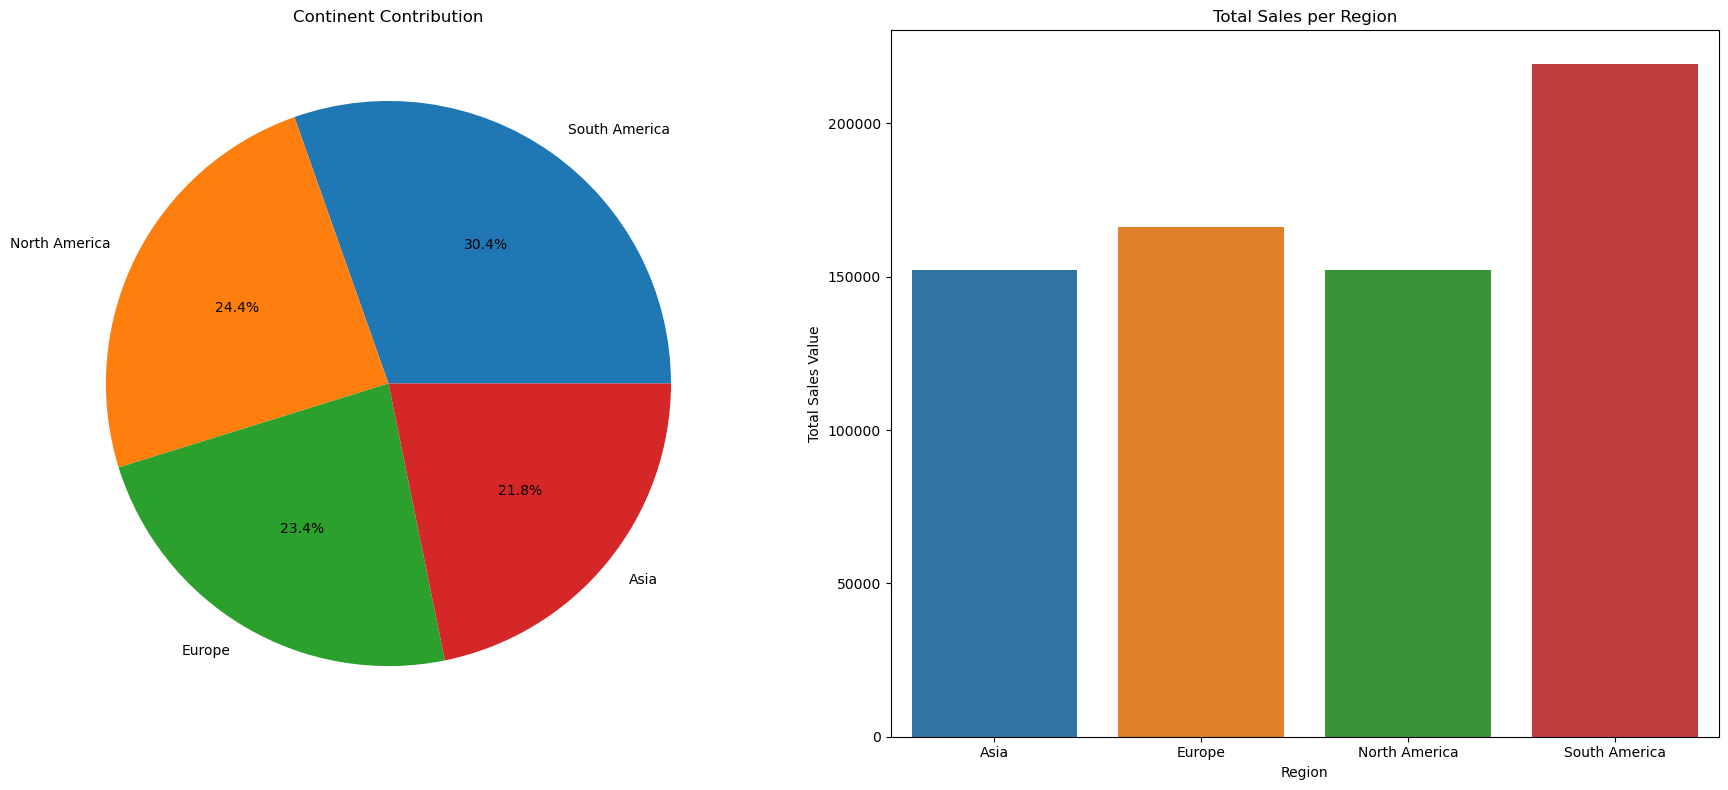

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
transaction_df['Region'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Continent Contribution')
ax[0].set_ylabel('')
region_sales = transaction_df.groupby('Region').agg({'TotalValue': 'sum'}).reset_index()
sns.barplot(x='Region', y='TotalValue', data=region_sales, estimator=sum, ax=ax[1])
plt.title('Total Sales per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.tight_layout()
plt.show()



### Insights:-
           1> The pie chart displays the relative share of each region’s purchase count as a percentage of the total.
            Here, South America contributes the most and Asia contributes the least to the total number of transactions.
           2> The count plot visually represents the absolute number of transactions for each region
            Here,  Asia contributes total sacles of around  150000

## Product preference In each Region

In [25]:
transaction_df.groupby(['Category','Region'])['Region'].count()

Category     Region       
Books        Asia             51
             Europe           64
             North America    65
             South America    90
Clothing     Asia             58
             Europe           47
             North America    60
             South America    63
Electronics  Asia             57
             Europe           58
             North America    60
             South America    79
Home Decor   Asia             52
             Europe           65
             North America    59
             South America    72
Name: Region, dtype: int64

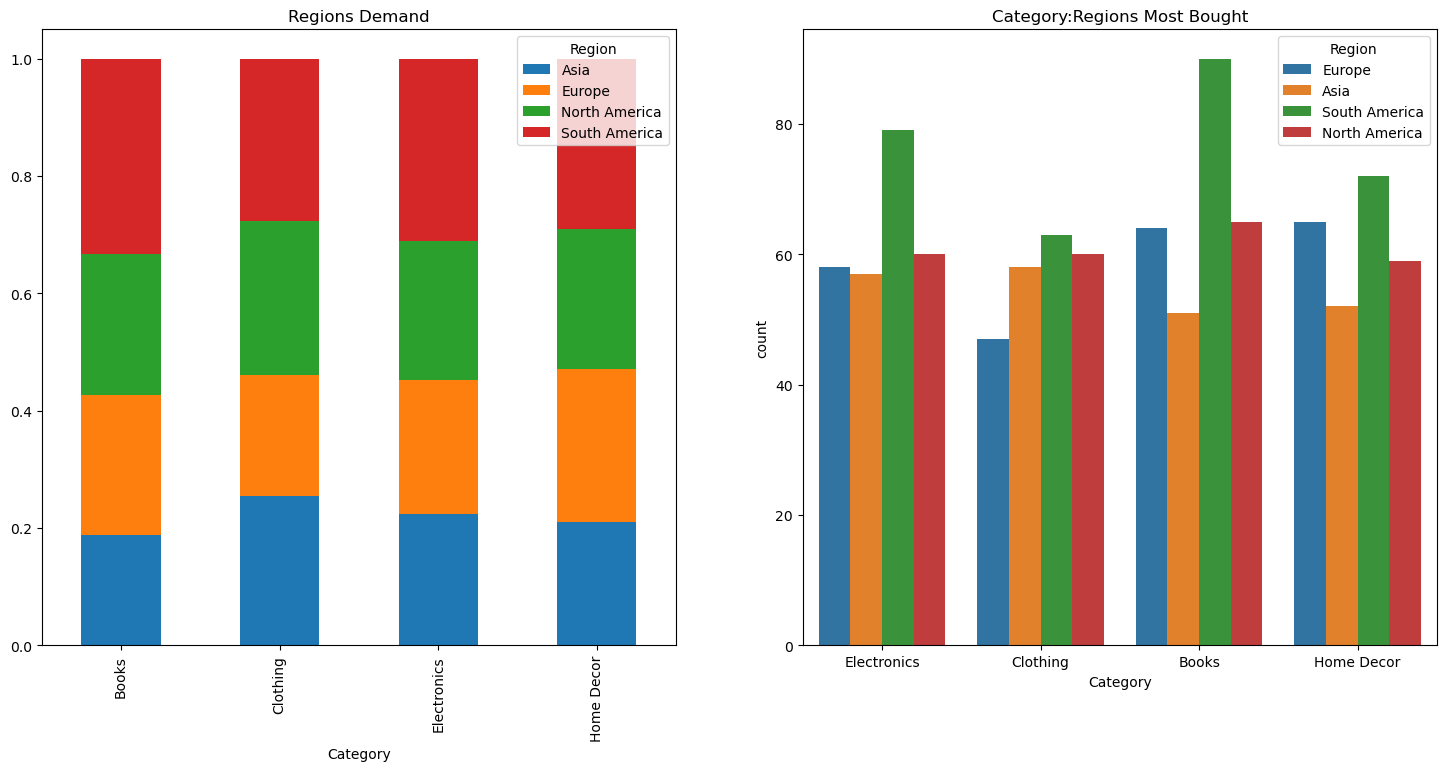

In [26]:

f,ax=plt.subplots(1,2, figsize=(18,8))
region_distribution = transaction_df.groupby(['Category'])['Region'].value_counts(normalize=True).unstack()
region_distribution.plot.bar(ax=ax[0], stacked=True) #percentage value
ax[0].set_title('Regions Demand')
sns.countplot(x='Category',hue='Region',data=transaction_df,ax=ax[1])  #absolute value
ax[1].set_title('Category:Regions Most Bought')
plt.show()

### Insights:-
           
          The distribution of regions (e.g., North, South, East, West) as a proportion of total demand for each category.
          By stacking, the relative contribution of each region within a category.
          Regional preferences: How different regions compare in their interest/demand for various product categories.
          For example, you might see that the South region contributes 60% of the demand for a particular category
          while other regions are less engaged
          
          Here, Books are mostly preferred by South America, followed by North America and Europe
          Through stacked bar graphs we can visualize the contribution of each regoin in different categories of sales
          
          

# Top 10 Products sold in the company

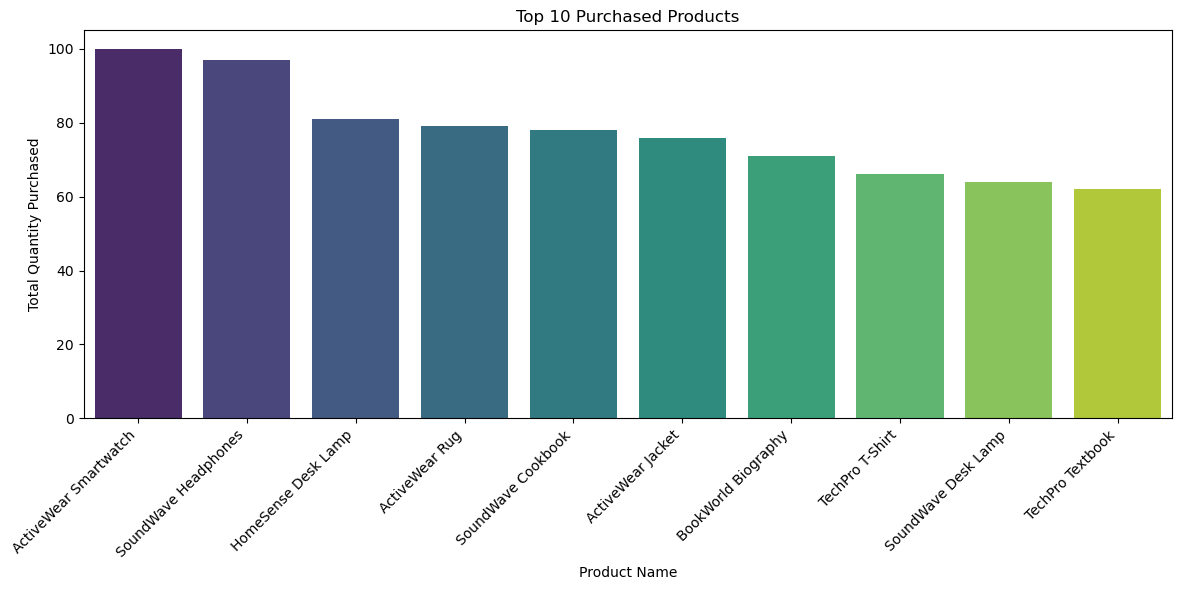

In [27]:
top_products = transaction_df.groupby('ProductName')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)

#visualize
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='viridis')
plt.title('Top 10 Purchased Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45, ha='right')  # Rotate product names for better readability
plt.tight_layout()

# Show the plot
plt.show()

### Insights:- 
                Here ActiveWear Smartwatches are the most sold product in the company

# Product Sales Distribution VS Region

In [28]:
filtered_df = transaction_df[transaction_df['ProductName'].isin(top_products['ProductName'])]                            
filtered_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Category,ProductName,Region,SignupDate
37,T00004,C0004,P049,2024-07-19 10:56:13,4,591.80,147.95,Books,TechPro Textbook,South America,2022-10-09
38,T00105,C0087,P049,2024-02-12 08:14:34,3,443.85,147.95,Books,TechPro Textbook,South America,2024-04-11
39,T00136,C0010,P049,2024-02-22 18:44:05,2,295.90,147.95,Books,TechPro Textbook,Europe,2022-12-15
40,T00237,C0065,P049,2024-02-27 22:16:22,2,295.90,147.95,Books,TechPro Textbook,North America,2024-07-10
41,T00239,C0132,P049,2024-12-06 19:03:54,2,295.90,147.95,Books,TechPro Textbook,Europe,2023-02-01
...,...,...,...,...,...,...,...,...,...,...,...
988,T00418,C0184,P077,2024-01-03 02:43:36,2,531.02,265.51,Electronics,ActiveWear Smartwatch,South America,2022-05-13
989,T00549,C0093,P077,2024-09-16 02:11:37,2,531.02,265.51,Electronics,ActiveWear Smartwatch,Asia,2024-07-13
990,T00624,C0105,P077,2024-08-03 23:04:47,4,1062.04,265.51,Electronics,ActiveWear Smartwatch,Europe,2024-11-11
991,T00778,C0175,P077,2024-07-18 11:21:41,4,1062.04,265.51,Electronics,ActiveWear Smartwatch,Asia,2022-04-16


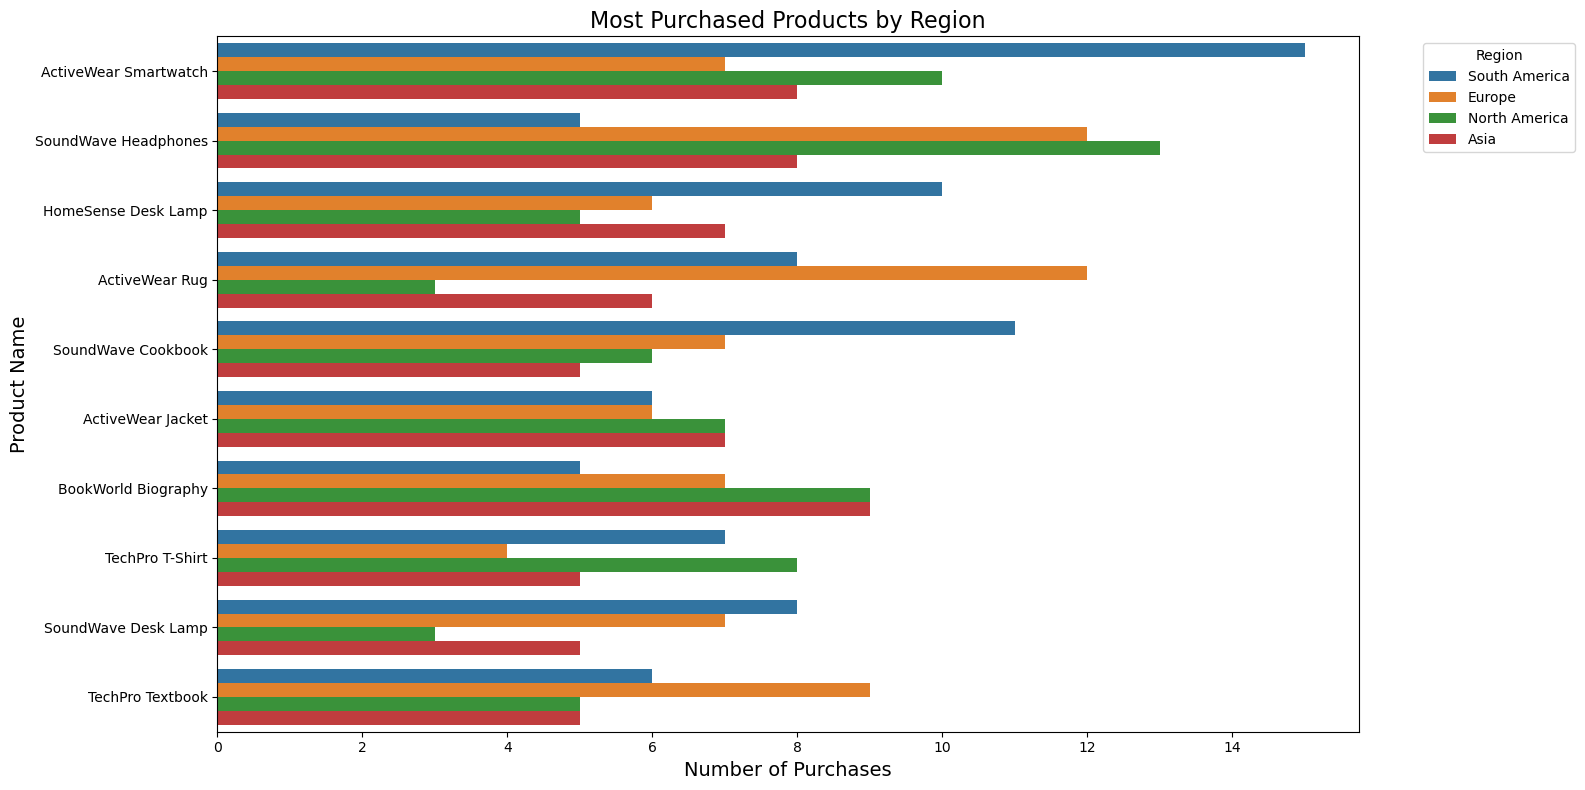

In [29]:
plt.figure(figsize=(16, 8))
sns.countplot(
    y='ProductName', hue='Region', data=filtered_df, order=top_products['ProductName']
)
plt.title('Most Purchased Products by Region', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insights:- 
                Here, SoundWave Headphones are mostly buyed in North America whereas TechPro Textbook is most popular in 
                Europe

# Customer's MAX vs Min Sales

In [34]:
max_purchase_row = transaction_df.loc[transaction_df['TotalValue'].idxmax()]
customer_id = max_purchase_row['CustomerID']
max_purchase_value = max_purchase_row['TotalValue']
min_purchase_row = transaction_df.loc[transaction_df['TotalValue'].idxmin()]
customer_id = min_purchase_row['CustomerID']
min_purchase_value = min_purchase_row['TotalValue']

In [36]:

print(f'The Customer with customer ID {customer_id} max purchase {max_purchase_value}')
print(f'The Customer with customer ID {customer_id} min purchase {min_purchase_value}')

The Customer with customer ID C0112 max purchase 1991.04
The Customer with customer ID C0112 min purchase 16.08


### Insights:- 
                Here maximum and minimum customer transaction/ purchase can be found and based on that sales and discounts                 and offers can be given

# Sales Trends Over Time


In [37]:
transaction_df['TransactionDate'] = pd.to_datetime(transaction_df['TransactionDate'])
sales_over_time = transaction_df.groupby(transaction_df['TransactionDate'].dt.date)['TotalValue'].sum().reset_index()
sales_over_time

,TransactionDate,TotalValue
0,2023-12-30,313.92
1,2023-12-31,3455.60
2,2024-01-01,1468.94
3,2024-01-02,1818.03
4,2024-01-03,2224.41
...,...,...
332,2024-12-24,2589.58
333,2024-12-25,1343.90
334,2024-12-26,5108.25
335,2024-12-27,752.56


In [38]:
transaction_df['TransactionDate'] = pd.to_datetime(transaction_df['TransactionDate'])
sales_over_time_monthly = transaction_df.groupby(transaction_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().reset_index()
sales_over_time_monthly

,TransactionDate,TotalValue
0,2023-12,3769.52
1,2024-01,66376.39
2,2024-02,51459.27
3,2024-03,47828.73
4,2024-04,57519.06
5,2024-05,64527.74
6,2024-06,48771.18
7,2024-07,71366.39
8,2024-08,63436.74
9,2024-09,70603.75


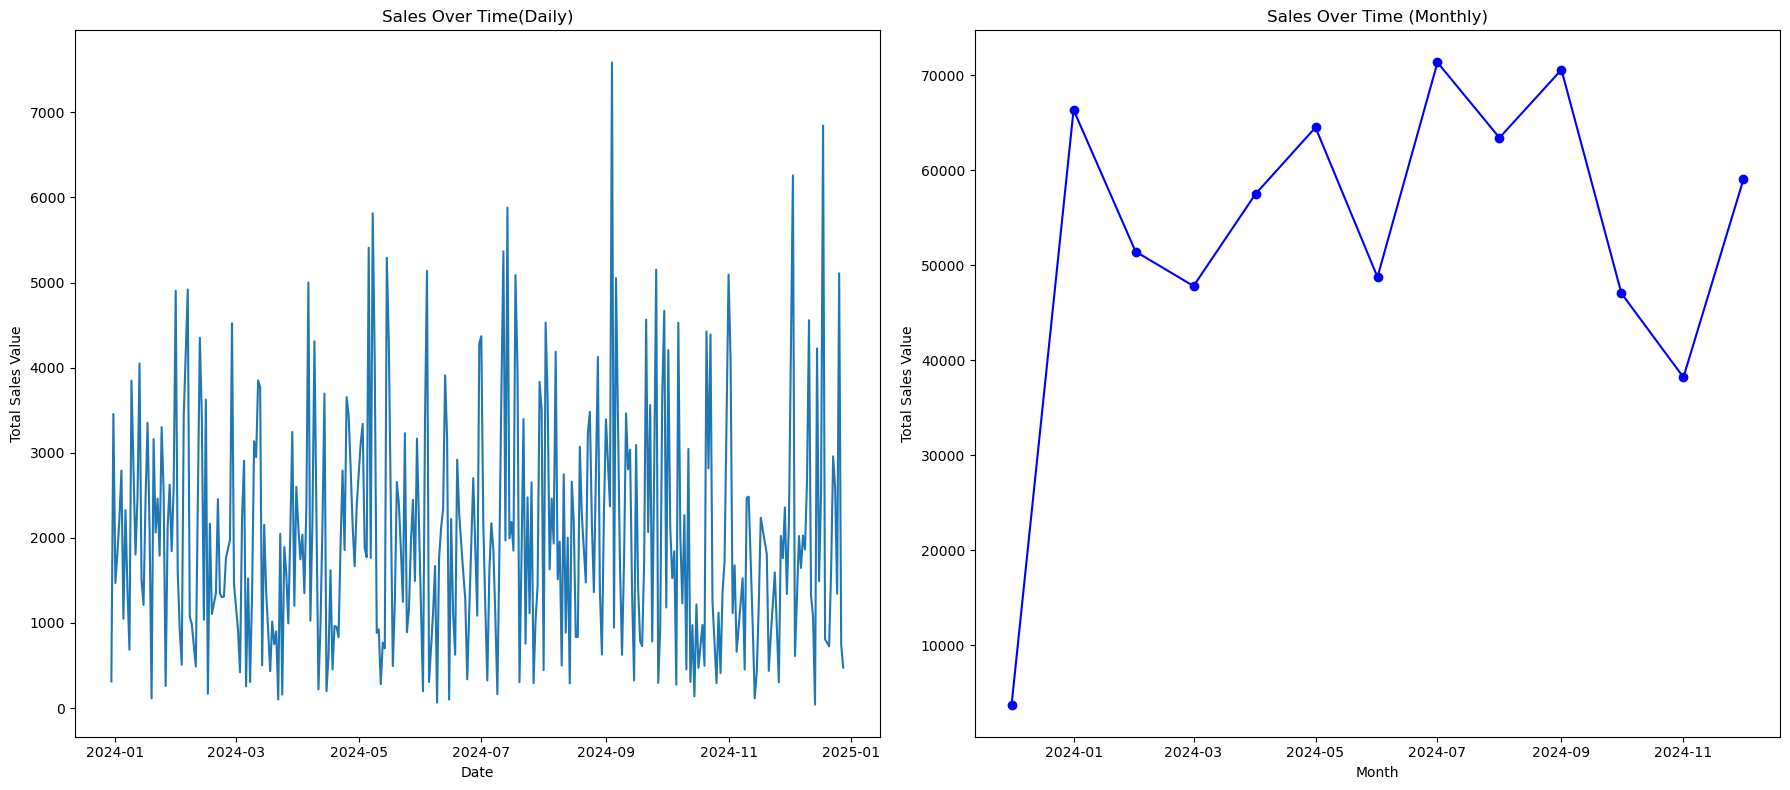

In [39]:
f,ax=plt.subplots(1,2, figsize=(18,8))
sns.lineplot(x='TransactionDate', y='TotalValue', data=sales_over_time, ax=ax[0])
ax[0].set_title('Sales Over Time(Daily)')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Total Sales Value')

# Convert 'TransactionDate' from Period to Timestamp by applying .dt.to_timestamp()
sales_over_time_monthly['TransactionDate'] = sales_over_time_monthly['TransactionDate'].dt.to_timestamp()

# Create the line plot

ax[1].plot(sales_over_time_monthly['TransactionDate'], sales_over_time_monthly['TotalValue'], marker='o', linestyle='-', color='b')

# Adding titles and labels
ax[1].set_title('Sales Over Time (Monthly)')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Total Sales Value')

# Display the plot
plt.tight_layout()
plt.show()

### Insights :-
                By analyzing time-based trends, we can determine certain seasons, months, or weeks with higher sales.
                
                Here, sales in the month of Febuary seems to have certain spike followed by the month of September-October
                which is the festive season.

# Customer Buying Behavior

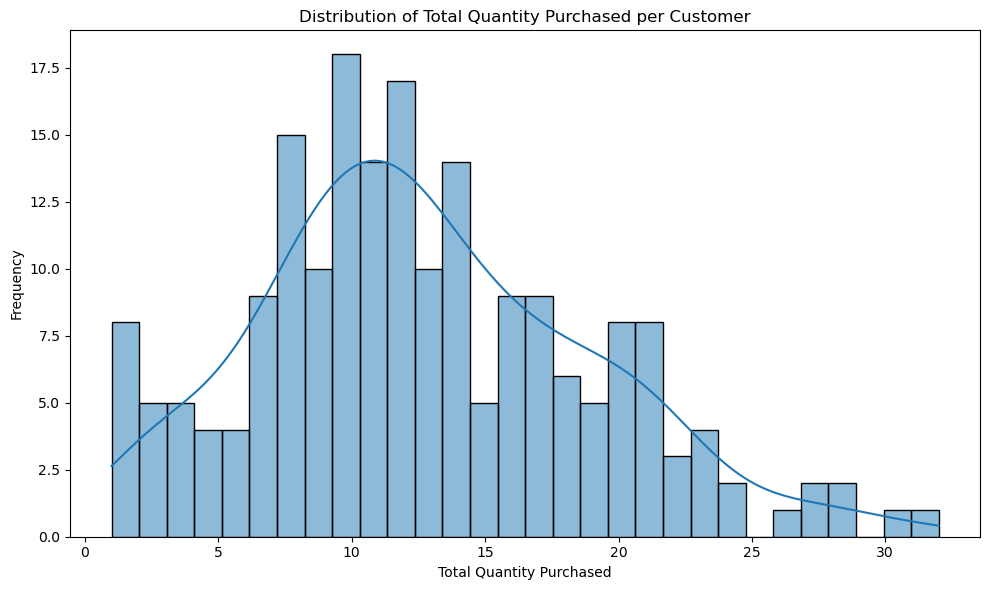

In [40]:
customer_purchase = transaction_df.groupby('CustomerID')['Quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchase['Quantity'], kde=True, bins=30)

plt.title('Distribution of Total Quantity Purchased per Customer')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Insights:- 
            Certain customers tend to buy more frequently or purchase higher quantities. 
            This can help with segmentation or customer profiling

# Price Distribution of Products


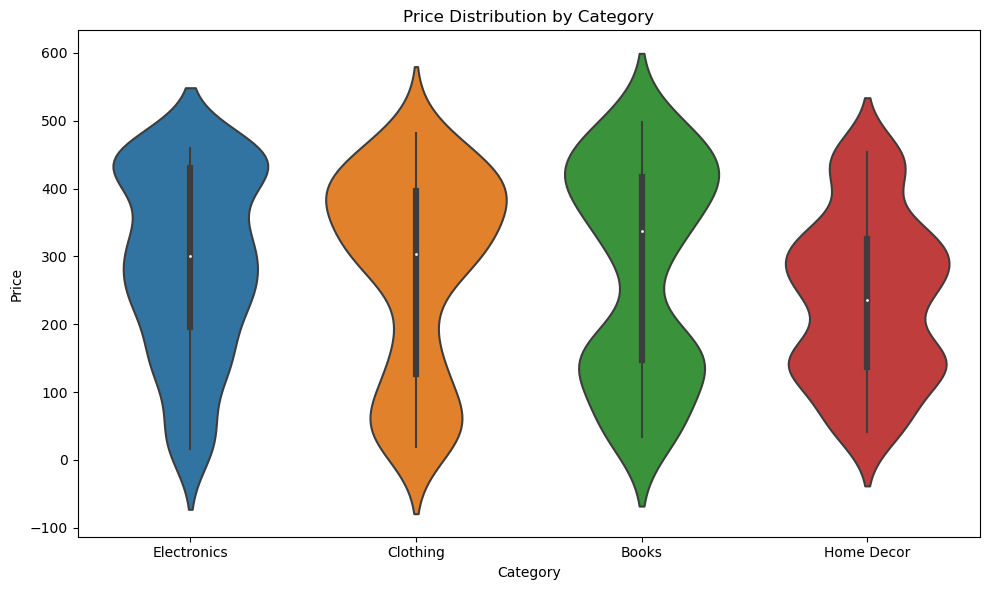

In [41]:
# Violin plot to compare price distribution across categories
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Price', data=transaction_df)

# Adding title and labels
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')

# Show the plot
plt.tight_layout()
plt.show()

### Insights :- 
               It determines the distribution of product prices, identify outliers, or see price trends for  different 
               product categories.     
            
            Here, price of Clothing are mostly around 450 while in case of Home Decor the price range varies from 100- 250

# Price Distribution by Category across Region

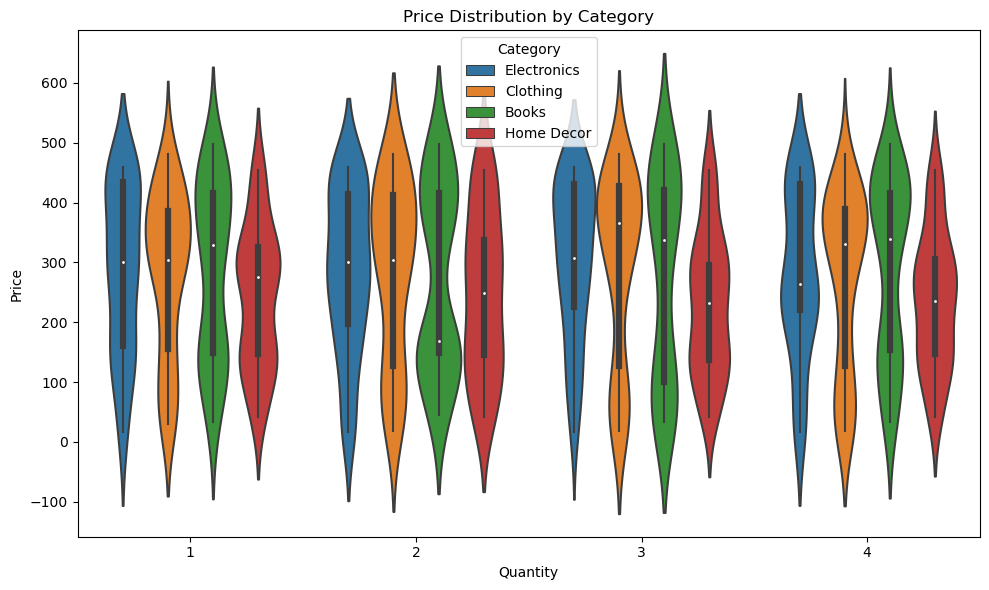

In [42]:
# Violin plot to compare price distribution across categories
plt.figure(figsize=(10, 6))
sns.violinplot(x='Quantity', y='Price', hue ='Category', data=transaction_df)

# Adding title and labels
plt.title('Price Distribution by Category')
plt.xlabel('Quantity')
plt.ylabel('Price')

# Show the plot
plt.tight_layout()
plt.show()

### Insight: 
            Identifies how the price and categories of products varies and how they are distributed across region.

# Correlation Matrix and Scatter Plot

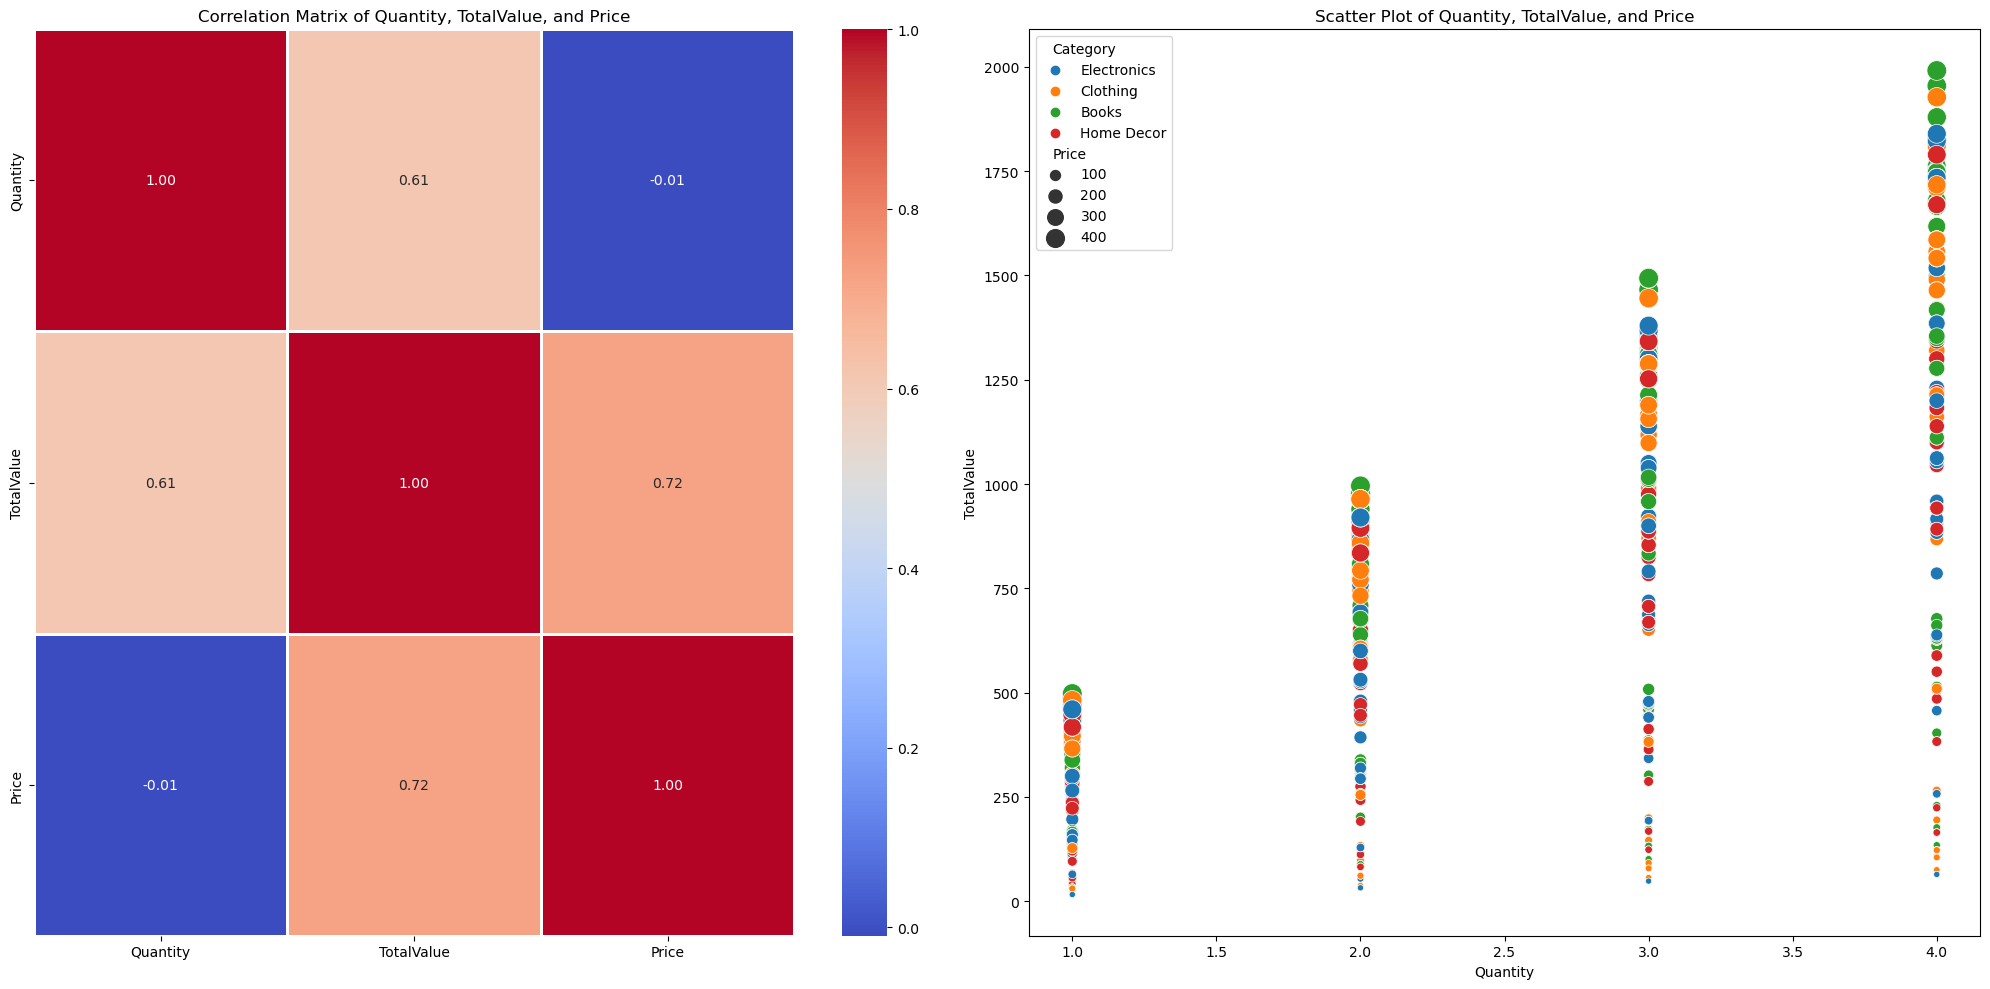

In [46]:
f,ax=plt.subplots(1,2, figsize=(20,10))
correlation_matrix = transaction_df[['Quantity', 'TotalValue', 'Price']].corr()

# Plot the heatmap for the correlation matrix

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, ax=ax[0])
ax[0].set_title('Correlation Matrix of Quantity, TotalValue, and Price')
#
sns.scatterplot(x='Quantity', y='TotalValue', data=transaction_df, hue='Category', size='Price', sizes=(20, 200))
ax[1].set_title('Scatter Plot of Quantity, TotalValue, and Price')
plt.tight_layout()
plt.show()



### Insight:-
                Show how the total value of a product correlates with its quantity sold. This can give insights into whether         high-value products are being bought in large quantities or not.

In [47]:
transaction_df["Transaction_Date"] = transaction_df["TransactionDate"].dt.date
transaction_df["Transaction_Time"] = transaction_df["TransactionDate"].dt.time
transaction_df = transaction_df.drop(columns=["TransactionDate"])

In [48]:
transaction_df["Transaction_Time"] = transaction_df["Transaction_Time"].astype(str)
transaction_df["hour"] = transaction_df["Transaction_Time"].apply(lambda x: int(x[:2]))


In [50]:
transaction_df.sample(3)

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,Category,ProductName,Region,SignupDate,Transaction_Date,Transaction_Time,hour
766,T00419,C0030,P004,3,287.07,95.69,Home Decor,BookWorld Rug,North America,2024-01-30,2024-07-12,13:34:04,13
489,T00861,C0141,P042,4,1517.76,379.44,Electronics,ActiveWear Headphones,Europe,2023-02-23,2024-09-26,21:52:56,21
72,T00952,C0139,P053,1,274.94,274.94,Home Decor,TechPro Rug,North America,2022-03-14,2024-10-06,06:02:45,6


# Transactions Per Hour

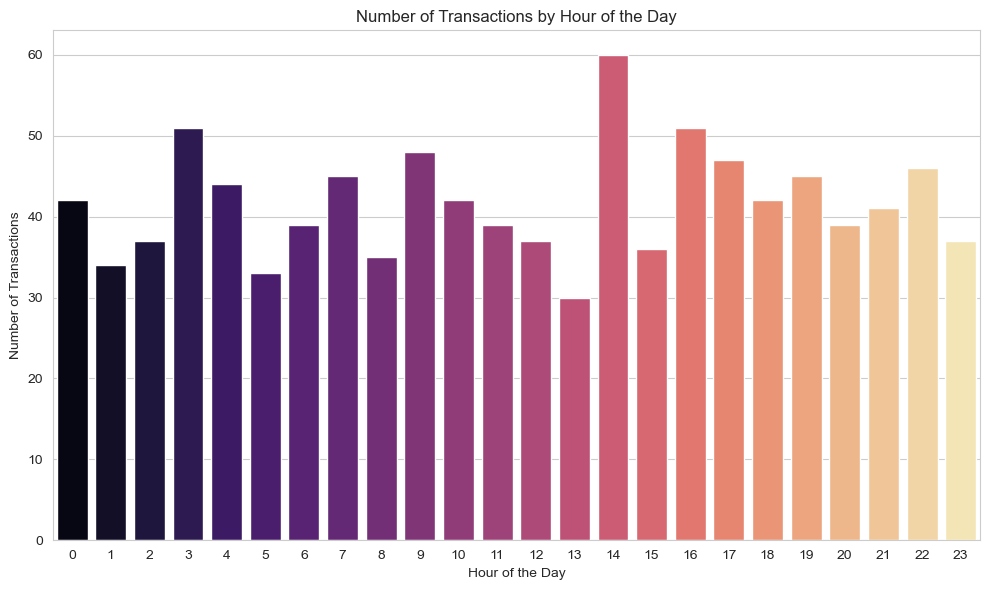

In [53]:

transactions_by_hour = transaction_df.groupby('hour')['TransactionID'].count().reset_index()

# Visualization
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='hour', y='TransactionID', data=transactions_by_hour, palette='magma')

# Add titles and labels
plt.title('Number of Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')

# Show the plot
plt.tight_layout()
plt.show()

### Insight:-
            1> Peak Sales Hours:The total sales by hour plot will show at what time of day most revenue is generated.
            If certain hours of the day consistently show higher sales values, it indicates that customers tend to make                 higher-value purchases during those hours.
            2> Optimal Timing for Promotions:promotions, specific shopping behaviors, or just more customers buying during             peak times.
            
            
            Here, most active timing for shopping is 13hr of the day